# Exploratory Data Analysis

In [6]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [7]:
# loading scripts
from manager import Manager
from processing import Processing
man = Manager()
pro = Processing()

In [8]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7f98790246d0; closed: 0>


In [9]:
# fetching data
data = man.fetch_data(conn=connection, limit=10000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
0,3ej4hd8,impression,0,0,qfkoin5l,90a66cd8b08a4506ac69779d16a25276,2021-11-09 10:14:03,36ab7d298620eacc80ead7b3ac233c9f/e252a06166e27...,United States,www.independent.co.uk,...,5963333.33,1789000.0,Percentage,0.0,1789000,direction,direction,NAv,NAv,right
1,3ej4hd8,impression,0,0,qfkoin5l,90a66cd8b08a4506ac69779d16a25276,2021-11-09 10:14:03,36ab7d298620eacc80ead7b3ac233c9f/e252a06166e27...,United States,www.independent.co.uk,...,5963333.33,1789000.0,Percentage,0.0,1789000,eng_type,eng_type,NAv,NAv,swipe
2,3ej4hd8,impression,0,0,qfkoin5l,90a66cd8b08a4506ac69779d16a25276,2021-11-09 10:14:03,36ab7d298620eacc80ead7b3ac233c9f/e252a06166e27...,United States,www.independent.co.uk,...,5963333.33,1789000.0,Percentage,0.0,1789000,videos_data,has_video,NAv,NAv,0
3,3ej4hd8,impression,0,0,qfkoin5l,90a66cd8b08a4506ac69779d16a25276,2021-11-09 10:14:03,36ab7d298620eacc80ead7b3ac233c9f/e252a06166e27...,United States,www.independent.co.uk,...,5963333.33,1789000.0,Percentage,0.0,1789000,colors,engagement,10,luminosity,0.4156862745098039
4,3ej4hd8,impression,0,0,qfkoin5l,90a66cd8b08a4506ac69779d16a25276,2021-11-09 10:14:03,36ab7d298620eacc80ead7b3ac233c9f/e252a06166e27...,United States,www.independent.co.uk,...,5963333.33,1789000.0,Percentage,0.0,1789000,colors,engagement,10,saturation,0.6132075471698113


In [10]:
# checking data
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")
pro.summ_columns(data)

 There are 5594 rows and 36 columns


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,7
1,types,0,0.0,object,2
2,width,0,0.0,object,3
3,height,0,0.0,object,3
4,creative_id,0,0.0,object,28
5,auction_id,0,0.0,object,45
6,browser_ts,0,0.0,datetime64[ns],45
7,game_key,0,0.0,object,17
8,geo_country,0,0.0,object,2
9,site_name,0,0.0,object,35


#

## Univariate Analysis

In [69]:

type_agr1 = pro.find_agg(data, ["types"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
brow_agr1 = pro.find_agg(data, ["browser"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
plat_agr1 = pro.find_agg(data, ["platform_os"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
devi_agr1 = pro.find_agg(data, ["device_type"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
serve_agr1 = pro.find_agg(data, ["serving_location"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
geo_agr1 = pro.find_agg(data, ["geo_country"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
place_agr1 = pro.find_agg(data, ["placement"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
kpis = pro.find_agg(data, ["kpis"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
cost_agr1 = pro.find_agg(data, ["cost_centre"], ["id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)

                 types  counts
2           impression    8956
1        first_dropped     753
0  click-through-event     291


<AxesSubplot:xlabel='types'>

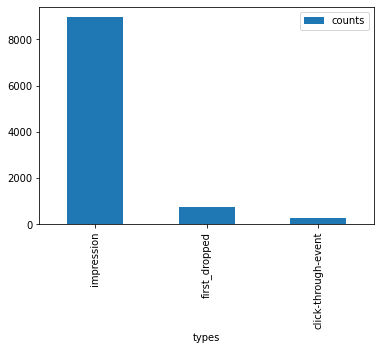

In [48]:
# types distribution
print(type_agr1)
type_agr1.plot.bar(x="types")

             browser  counts
10     Mobile Safari    2639
2      Chrome Mobile    2589
5           Facebook    1961
16  Samsung Internet     738
14         Pinterest     527


<AxesSubplot:xlabel='browser'>

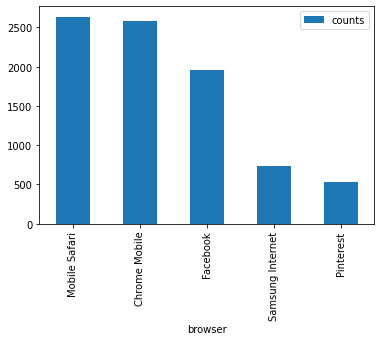

In [53]:
# browser distribution
print(brow_agr1)
brow_agr1.plot.bar(x="browser")

                                           placement  counts
0         320x480 (Fullscreen mobile / interstitial)    8154
1  320x480 (Fullscreen mobile / interstitial)\n30...    1846


<AxesSubplot:xlabel='placement'>

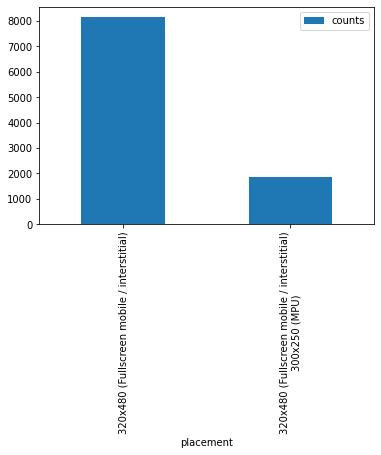

In [64]:
# browser distribution
print(place_agr1)
place_agr1.plot.bar(x="placement")

                        kpis  counts
2  VTR\nCTR\nEngagement Rate    6955
1            Engagement Rate    1846
0       CTR\nEngagement Rate    1199


<AxesSubplot:xlabel='kpis'>

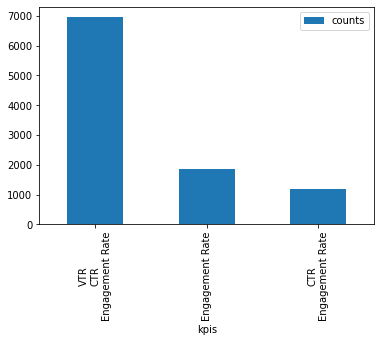

In [70]:
# browser distribution
print(kpis)
kpis.plot.bar(x="kpis")

In [60]:
pd.crosstab(selection1["types"], selection1["browser"], normalize="index")

browser,Amazon Silk,Chrome,Chrome Mobile,Chrome Mobile WebView,Chrome Mobile iOS,Facebook,Firefox,Firefox Mobile,Firefox iOS,Googlebot,Mobile Safari,Mobile Safari UI/WKWebView,Opera Mobile,Other,Pinterest,Safari,Samsung Internet
types,,,,,,,,,,,,,,,,,
click-through-event,0.000000,0.006873,0.082474,0.065292,0.006873,0.553265,0.000000,0.000000,0.000000,0.000000,0.182131,0.027491,0.000000,0.000000,0.027491,0.000000,0.048110
first_dropped,0.000000,0.009296,0.207171,0.041169,0.010624,0.475432,0.002656,0.000000,0.000000,0.000000,0.154050,0.035857,0.001328,0.000000,0.013280,0.000000,0.049137
impression,0.012171,0.049687,0.268982,0.025123,0.031152,0.161009,0.000782,0.000112,0.000335,0.000112,0.275793,0.040531,0.000223,0.000335,0.056833,0.000112,0.076708


In [62]:
pd.crosstab(selection1["types"], selection1["device_type"], normalize="index")

device_type,Mobile,Tablet
types,,
click-through-event,1.000000,0.000000
first_dropped,0.990704,0.009296
impression,0.891134,0.108866


In [65]:
pd.crosstab(data["types"], data["placement"], normalize="index")

placement,320x480 (Fullscreen mobile / interstitial),320x480 (Fullscreen mobile / interstitial)\n300x250 (MPU)
types,,
click-through-event,0.869416,0.130584
first_dropped,0.794157,0.205843
impression,0.815431,0.184569


In [66]:

pd.crosstab(data["types"], data["campaign_objectives"], normalize="index")

campaign_objectives,Brand Awareness,Brand Awareness\nAudience Engagement,Brand Awareness\nAudience Engagement\nVideo Views,Brand Awareness\nProduct Awareness\nMessage Recall\nSentiment / Favourability\nConsideration / Purchase Intent\nDrive Traffic (to site)\nAudience Engagement
types,,,,
click-through-event,0.185567,0.000000,0.683849,0.130584
first_dropped,0.124834,0.123506,0.545817,0.205843
impression,0.117351,0.376842,0.321237,0.184569


In [67]:
pd.crosstab(data["types"], data["kpis"], normalize="index")

kpis,CTR\nEngagement Rate,Engagement Rate,VTR\nCTR\nEngagement Rate
types,,,
click-through-event,0.185567,0.130584,0.683849
first_dropped,0.124834,0.205843,0.669323
impression,0.117351,0.184569,0.698079


In [ ]:
# label encoding
# normalizing
# distribution and correlation for numerical values.
# nlp to create word cloud of text part of the data
# removing highly correlated ones
# using random forest classifier
# create feature importance.
# text and edge extraction from the images.

In [ ]:
# pie chart


df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

bar plot
top_10_countries_with_negative_polarity.plot(kind='bar', ax=axes[0], figsize=(10,10), color='orange', title='Top 10 Countries with Negative Polarity', legen

In [ ]:
# top selections aggregation
top_10_countries_with_negative_polarity = negative_tweets.groupby('place')['sentiment'].value_counts().nlargest(10,  'first')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#
# Load the wine datasets
#
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df[13] = wine.target
df.columns = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline', 'class']
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.3, random_state=1)
#
# Feature scaling
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Training / Test Dataframe
#
cols = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline']
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

from sklearn.ensemble import RandomForestClassifier
#
# Train the mode
#
forest.fit(X_train_std, y_train.values.ravel())

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
a   int64
b   int64
c   object
d   object
e   object
f   object
g   object
dtype: object

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in df.columns:
    if df[x].dtypes=='object':
       df[x]=le.fit_transform(df[x].astype(str))
corr = df.corr()